# **Packages Imports**

In [2]:
import pandas as pd

# **Creation of the Dataframe**

In [3]:
# sep ----> Standard: ','
# low_memory ----> Standard: True -----> False | used when the archive has high data

df =  pd.read_csv('/content/household_power_consumption 2.txt', sep=';', low_memory=False)

# **Exploratory Data Analysis**

In [4]:
df.shape
print(f'The dataframe has {df.shape[0]} registries and {df.shape[1]} attributes')

The dataframe has 2046379 registries and 9 attributes


In [5]:
# Showing the first 10 registries
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **Global_active_power and Global_reactive_power**

**Global_active_power** = É a potência que é consumida e transformada em trabalho útil como:

*   Iluminar uma lâmpada
*   Aquecer uma resistência
*   Girar um motor de máquina

-------


**Global_reactive_power** = Ela não realiza trabalho útil diretamente, É a potência que oscila entre a fonte e a carga devido a campos magnéticos (indutores, motores, transformadores) ou elétricos (capacitores), Embora não produza trabalho, é necessária para manter o funcionamento de dispositivos eletromagnéticos (motores, bobinas, transformadores).





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046379 entries, 0 to 2046378
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 140.5+ MB


In [7]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,1
Sub_metering_3,25980


In [8]:
perc = 100 * (25979 / df.shape[0])

print(f'O percentual de registros ausentes é de {perc: .3f}%')

O percentual de registros ausentes é de  1.270%


In [9]:
# Isolando as colunas que não quero tornar em numéricos
colunas_excluir = ["Date", "Time"]

# Converter todas as outras colunas para numérico
for col in df.columns:
    if col not in colunas_excluir:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046379 entries, 0 to 2046378
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 140.5+ MB


In [11]:
# Convertendo a coluna data para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

In [12]:
# Converter Time de string para timedelta
df["Time"] = pd.to_timedelta(df["Time"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046379 entries, 0 to 2046378
Data columns (total 9 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    float64        
 3   Global_reactive_power  float64        
 4   Voltage                float64        
 5   Global_intensity       float64        
 6   Sub_metering_1         float64        
 7   Sub_metering_2         float64        
 8   Sub_metering_3         float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 140.5 MB


In [14]:
# Criando a nova coluna com o dia da semana correspondente
df["Dia_Semana"] = df["Date"].dt.day_name()

In [15]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday
5,2006-12-16,0 days 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,Saturday
6,2006-12-16,0 days 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,Saturday
7,2006-12-16,0 days 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,Saturday
8,2006-12-16,0 days 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,Saturday
9,2006-12-16,0 days 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,Saturday


In [16]:
# Excluir registros ausentes
df = df.dropna()

In [17]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Dia_Semana,0


**Filtrando registros de 2007 e calculando a média de consumo diário**

In [18]:
# Filtrar apenas o ano de 2007
df_2007 = df[df["Date"].dt.year == 2007]

In [19]:
# Agrupar por dia e calcular a média diária
media_diaria = df_2007.groupby(df_2007["Date"].dt.date)["Global_active_power"].mean()

media_diaria

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


### **Criando gráficos**

Utilizando o Seaborn para ver a variação da coluna Global_active_power em um dia

In [20]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
dia_escolhido = pd.to_datetime("01/02/2007")

# Filtrar o DataFrame para esse dia
df_dia = df[df["Date"].dt.date == dia_escolhido.date()]

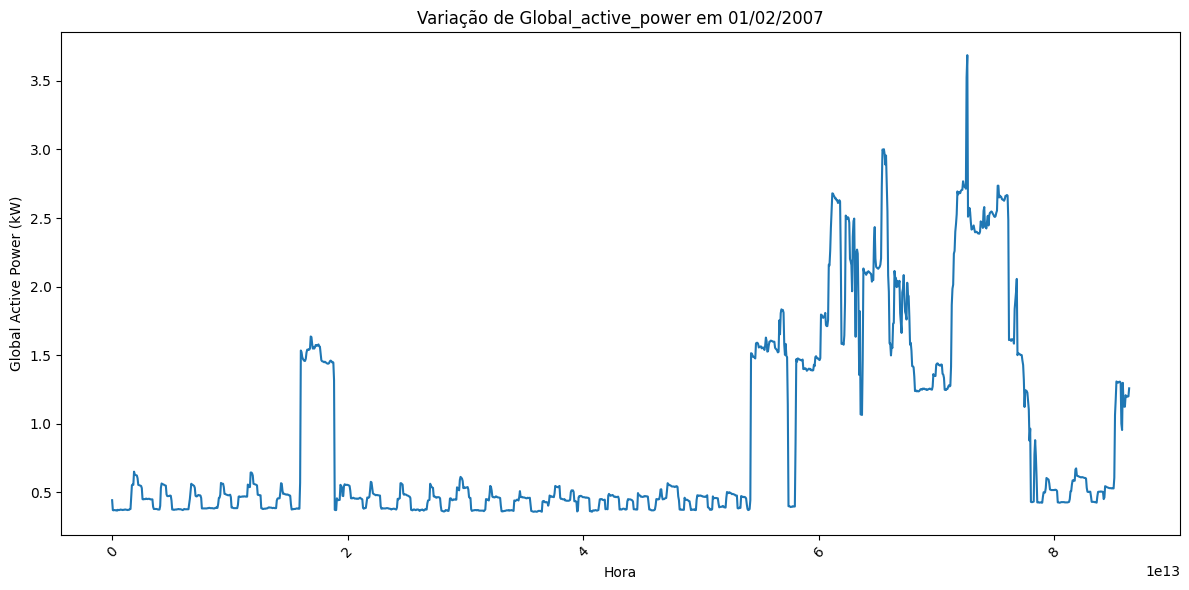

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_dia,
    x="Time",
    y="Global_active_power"
)

plt.xticks(rotation=45)  # Rotaciona os horários para melhor visualização
plt.title("Variação de Global_active_power em 01/02/2007")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.tight_layout()
plt.show()

**Histograma de Voltage**

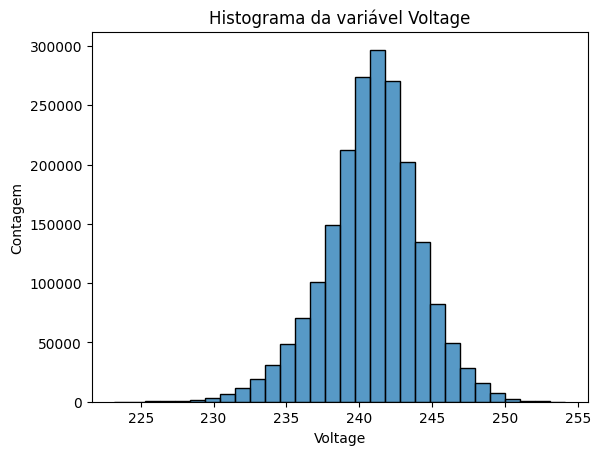

In [23]:
# Plotando o histograma
sns.histplot(data=df, x="Voltage", bins=30, kde=False)  # bins ajusta a quantidade de barras
plt.title("Histograma da variável Voltage")
plt.xlabel("Voltage")
plt.ylabel("Contagem")
plt.show()

<Axes: xlabel='Voltage', ylabel='Count'>

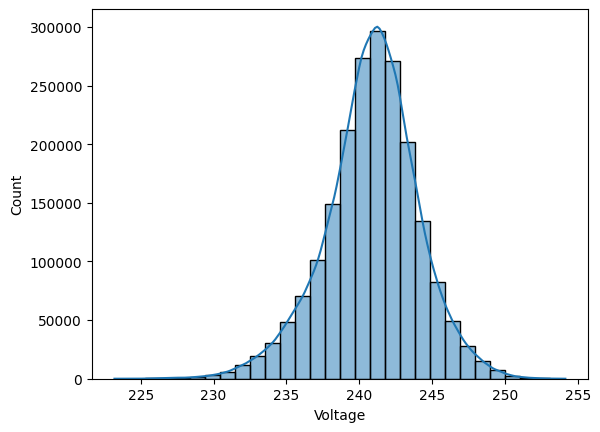

In [24]:
sns.histplot(data=df, x="Voltage", bins=30, kde=True)

O histograma indica que a tensão (Voltage) se mantém muito estável em torno de 240 V, com pouca variação, o que é típico de medições residenciais ou industriais com boa regulação.

**Calculando a média mensal do período**

In [25]:
media_mensal = df.groupby(df["Date"].dt.to_period("M"))["Global_active_power"].mean().reset_index()
media_mensal.rename(columns={"Global_active_power": "Media_Global_Active_Power"}, inplace=True)
print(media_mensal)

       Date  Media_Global_Active_Power
0   2006-12                   1.901295
1   2007-01                   1.546034
2   2007-02                   1.401084
3   2007-03                   1.318627
4   2007-04                   0.891189
5   2007-05                   0.985862
6   2007-06                   0.826814
7   2007-07                   0.667367
8   2007-08                   0.764186
9   2007-09                   0.969318
10  2007-10                   1.103911
11  2007-11                   1.294473
12  2007-12                   1.626474
13  2008-01                   1.459920
14  2008-02                   1.181384
15  2008-03                   1.245337
16  2008-04                   1.115972
17  2008-05                   1.024281
18  2008-06                   0.994096
19  2008-07                   0.794781
20  2008-08                   0.276488
21  2008-09                   0.987680
22  2008-10                   1.136768
23  2008-11                   1.387066
24  2008-12              

In [26]:
# Encontrado o dia com maior consumo ativo
consumo_diario = df.groupby(df["Date"].dt.date)["Global_active_power"].sum()

In [27]:
# Encontrando o dia com maior consumo
dia_max = consumo_diario.idxmax()
valor_max = consumo_diario.max()

print(f"O dia com maior consumo foi {dia_max} com {valor_max:.2f} kW")

O dia com maior consumo foi 2006-12-23 com 4773.39 kW


In [28]:
# weekday(): segunda=0, domingo=6
media_consumo = df.groupby(df['Date'].dt.weekday >= 5)['Global_active_power'].mean()

# Renomear índice para facilitar interpretação
media_consumo.index = ['Dias de semana', 'Finais de semana']

media_consumo

,Global_active_power
Dias de semana,1.032975
Finais de semana,1.234413


É possível notar que há mais gasto de energia durante o final de semana, provavelmente devido a muitas pessoas ficarem em casa durante estes dias.

## Calculando a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [31]:
# Calculando a correlação entre as variáveis
correlation_matrix = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]].corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.248043 -0.396150   
Global_reactive_power             0.248043               1.000000 -0.113219   
Voltage                          -0.396150              -0.113219  1.000000   
Global_intensity                  0.998890               0.267201 -0.407758   

                       Global_intensity  
Global_active_power            0.998890  
Global_reactive_power          0.267201  
Voltage                       -0.407758  
Global_intensity               1.000000  


## Criando uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3

In [34]:
# Criando a nova variável somando as colunas de sub-medição
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

## Verificando se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [36]:
# Calcular a média mensal de Total_Sub_metering
media_mensal_sub = df.groupby(df["Date"].dt.to_period("M"))["Total_Sub_metering"].mean().reset_index()
media_mensal_sub.rename(columns={"Total_Sub_metering": "Media_Total_Sub_metering"}, inplace=True)

# Calcular a média mensal de Global_active_power (already calculated in media_mensal)
# media_mensal is already available from previous execution

# Combinar as duas médias mensais para comparação
comparacao_mensal = pd.merge(media_mensal, media_mensal_sub, on="Date")

# Verificar se em algum mês a média de Total_Sub_metering ultrapassa a média de Global_active_power
meses_ultrapassam = comparacao_mensal[comparacao_mensal["Media_Total_Sub_metering"] > comparacao_mensal["Media_Global_Active_Power"]]

if not meses_ultrapassam.empty:
    print("Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:")
    print(meses_ultrapassam)
else:
    print("Não há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:
       Date  Media_Global_Active_Power  Media_Total_Sub_metering
0   2006-12                   1.901295                 10.873181
1   2007-01                   1.546034                 10.423518
2   2007-02                   1.401084                  9.486135
3   2007-03                   1.318627                 10.212863
4   2007-04                   0.891189                  6.839375
5   2007-05                   0.985862                  8.452442
6   2007-06                   0.826814                  7.379151
7   2007-07                   0.667367                  5.697724
8   2007-08                   0.764186                  6.979336
9   2007-09                   0.969318                  8.206236
10  2007-10                   1.103911                  8.674493
11  2007-11                   1.294473                  9.819413
12  2007-12                   1.626474                 11.636551
13  

## Gráfico de série temporal do Voltage para o ano de 2008.

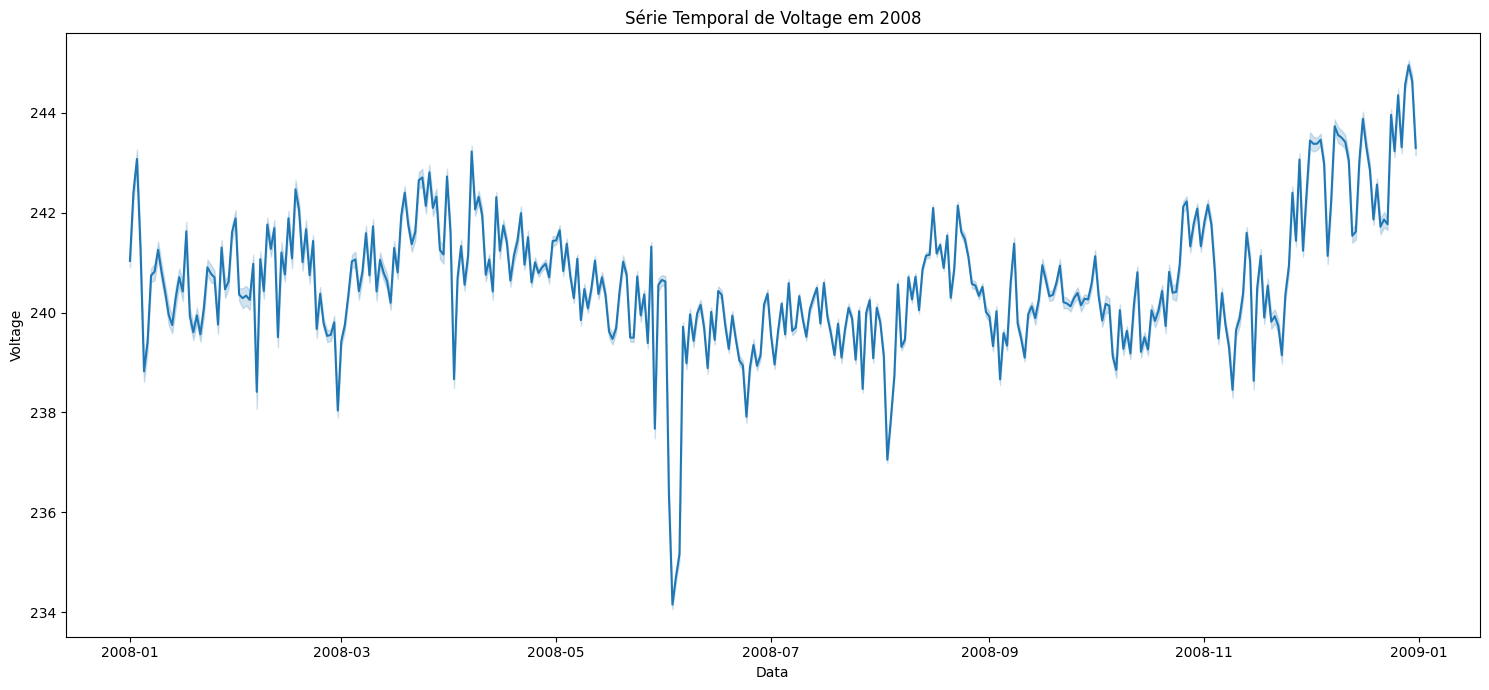

In [39]:
# Filtrar o DataFrame para o ano de 2008
df_2008 = df[df["Date"].dt.year == 2008]

# Criar o gráfico de série temporal para Voltage em 2008
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_2008, x="Date", y="Voltage")
plt.title("Série Temporal de Voltage em 2008")
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

## Comparando o consumo entre os meses de verão e inverno (no hemisfério norte)

Média de Global_active_power no verão (Hemisfério Norte): 0.73 kW
Média de Global_active_power no inverno (Hemisfério Norte): 1.42 kW


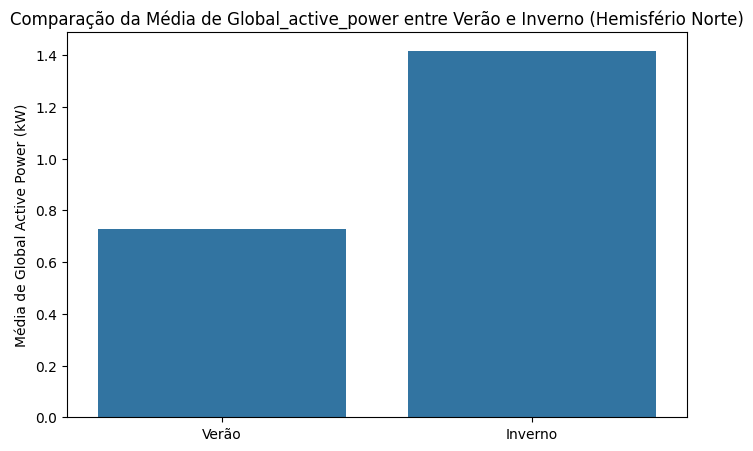

In [41]:
# Define summer and winter months in the Northern Hemisphere
summer_months = [6, 7, 8]  # June, July, August
winter_months = [12, 1, 2] # December, January, February

# Filter data for summer and winter months
df_summer = df[df["Date"].dt.month.isin(summer_months)]
df_winter = df[df["Date"].dt.month.isin(winter_months)]

# Calculate the average Global_active_power for summer and winter
media_verao = df_summer["Global_active_power"].mean()
media_inverno = df_winter["Global_active_power"].mean()

print(f"Média de Global_active_power no verão (Hemisfério Norte): {media_verao:.2f} kW")
print(f"Média de Global_active_power no inverno (Hemisfério Norte): {media_inverno:.2f} kW")

# Optional: Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=["Verão", "Inverno"], y=[media_verao, media_inverno])
plt.title("Comparação da Média de Global_active_power entre Verão e Inverno (Hemisfério Norte)")
plt.ylabel("Média de Global Active Power (kW)")
plt.show()

## Aplicando uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

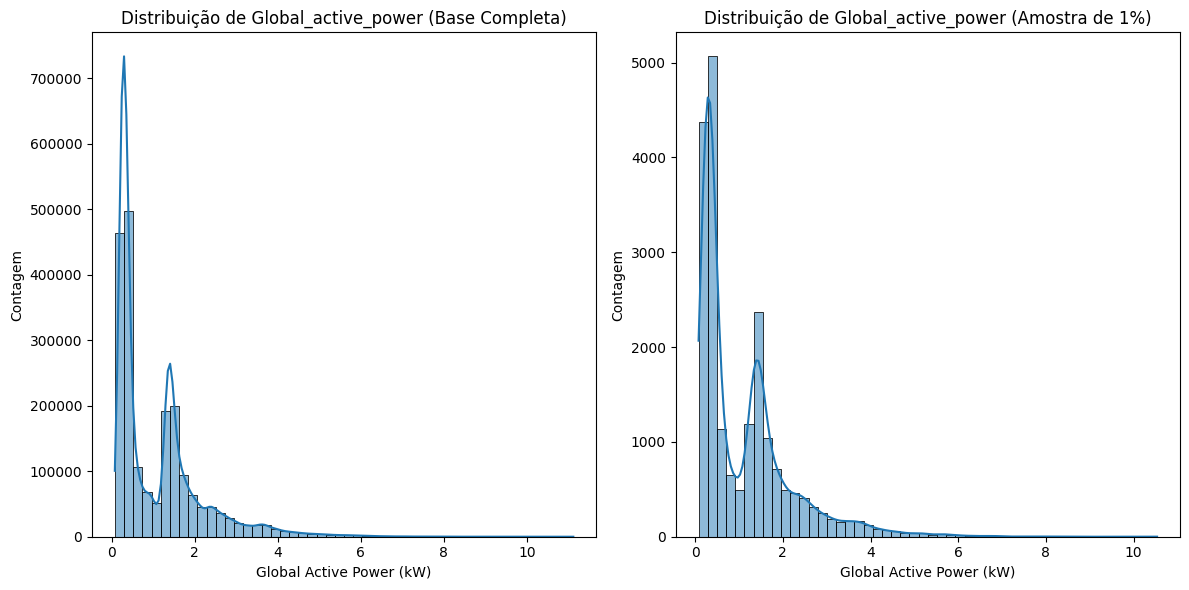

In [40]:
# Aplicar amostragem aleatória de 1%
df_sample = df.sample(frac=0.01, random_state=42) # random_state para reprodutibilidade

# Plotar histograma da base completa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.histplot(data=df, x="Global_active_power", bins=50, kde=True)
plt.title("Distribuição de Global_active_power (Base Completa)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Contagem")

# Plotar histograma da amostra
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
sns.histplot(data=df_sample, x="Global_active_power", bins=50, kde=True)
plt.title("Distribuição de Global_active_power (Amostra de 1%)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Contagem")

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## Utilizando uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Identificar as colunas numéricas para normalizar (excluindo a coluna de data e hora e a coluna calculada)
numerical_cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o scaler nas colunas selecionadas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Exibir as primeiras linhas do DataFrame com as colunas normalizadas
print(df.head())

        Date            Time  Global_active_power  Global_reactive_power  \
0 2006-12-16 0 days 17:24:00             0.374796               0.300719   
1 2006-12-16 0 days 17:25:00             0.478363               0.313669   
2 2006-12-16 0 days 17:26:00             0.479631               0.358273   
3 2006-12-16 0 days 17:27:00             0.480898               0.361151   
4 2006-12-16 0 days 17:28:00             0.325005               0.379856   

    Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0  0.376090          0.377593             0.0          0.0125        0.548387   
1  0.336995          0.473029             0.0          0.0125        0.516129   
2  0.326010          0.473029             0.0          0.0250        0.548387   
3  0.340549          0.473029             0.0          0.0125        0.548387   
4  0.403231          0.323651             0.0          0.0125        0.548387   

  Dia_Semana  Total_Sub_metering  
0   Saturday         

## K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.

Mean values of features for each cluster:
         Global_active_power  Global_reactive_power   Voltage  \
Cluster                                                         
0                   0.136995               0.096728  0.575767   
1                   0.093052               0.087206  0.571581   
2                   0.055390               0.086960  0.564007   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
Cluster                                                                     
0                0.134692        0.023385        0.033522        0.299204   
1                0.092849        0.012658        0.014070        0.219453   
2                0.057225        0.004742        0.006715        0.119068   

         Total_Sub_metering  
Cluster                      
0                 14.014954  
1                  9.042542  
2                  4.645623  


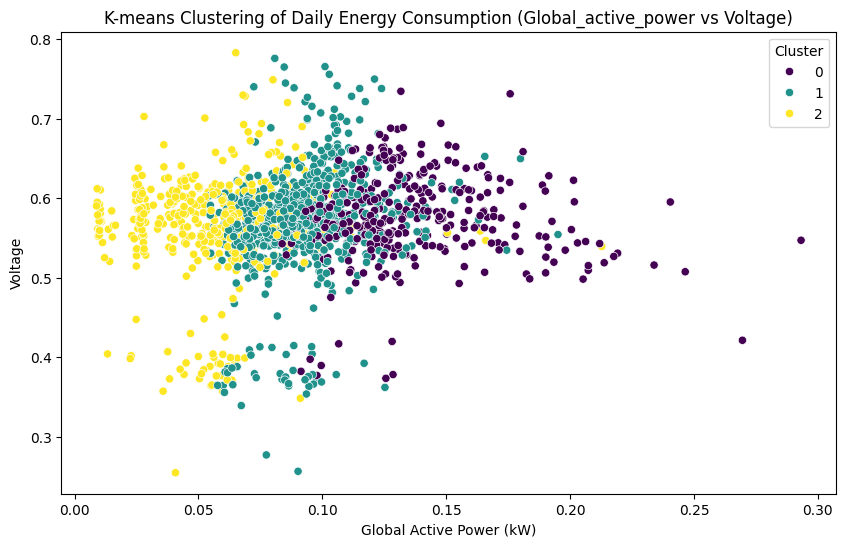

In [44]:
from sklearn.cluster import KMeans

# Aggregate data to get daily consumption
df_daily = df.groupby("Date")[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]].mean().reset_index()

# Select features for clustering (using only numerical features that are not date/time)
features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily["Cluster"] = kmeans.fit_predict(df_daily[features])

# Interpret the results by looking at the mean values of each feature for each cluster
cluster_means = df_daily.groupby("Cluster")[features].mean()
print("Mean values of features for each cluster:")
print(cluster_means)

# Optional: Visualize the clusters (e.g., using a scatter plot of two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_daily, x="Global_active_power", y="Voltage", hue="Cluster", palette="viridis")
plt.title("K-means Clustering of Daily Energy Consumption (Global_active_power vs Voltage)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Voltage")
plt.show()

## Realizei uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

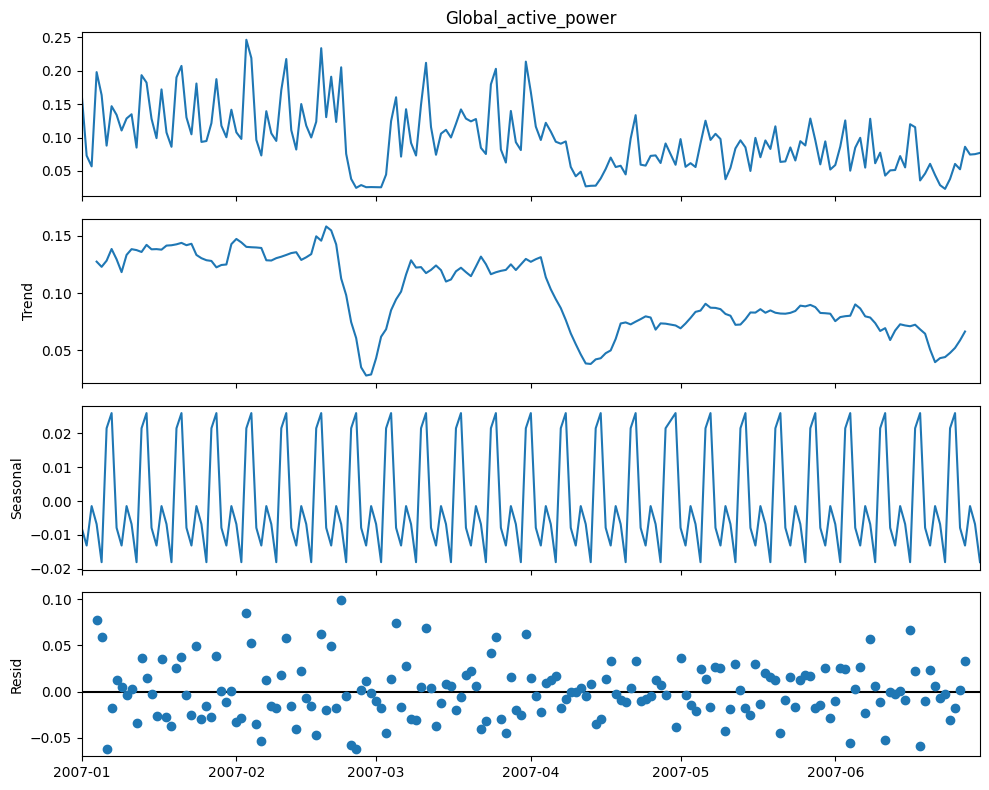

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to daily frequency and take the mean of 'Global_active_power'
df_daily_power = df.set_index("Date")["Global_active_power"].resample("D").mean()

# Select a 6-month period for decomposition (e.g., the first 6 months of 2007)
start_date = "2007-01-01"
end_date = "2007-06-30"
df_6months = df_daily_power[start_date:end_date]

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_6months.dropna(), model="additive", period=7) # Use additive model and specify period=7 for weekly seasonality

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

## Treinando um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the data
X = df[["Global_intensity"]] # Feature
y = df["Global_active_power"] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optional: Print the model coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Global_intensity: {model.coef_[0]:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
Intercept: -0.00
Coefficient for Global_intensity: 1.04
